
Importing Libraries:

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


Reading and Checking Data of Stock Dataset:

In [2]:

data = pd.read_csv("TCS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-04-2020,2.17,2.27,2.02,2.14,2.14,327700
1,20-04-2020,2.12,2.15,2.02,2.06,2.06,219200
2,21-04-2020,2.04,2.07,1.98,2.03,2.03,230300
3,22-04-2020,2.02,2.08,1.95,1.99,1.99,273000
4,23-04-2020,1.98,2.12,1.97,2.05,2.05,304000


In [3]:
data.shape

(252, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
data.nunique()

Date         252
Open         213
High         214
Low          220
Close        219
Adj Close    219
Volume       252
dtype: int64

In [6]:
list_columns = data.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,8.387183,8.771746,8.059802,8.403849,8.403849,9.321357e+05
std,5.110053,5.295032,4.906865,5.096171,5.096171,9.021871e+05
min,1.980000,2.050000,1.870000,1.990000,1.990000,7.380000e+04
25%,3.450000,3.562500,3.347500,3.472500,3.472500,2.847750e+05
50%,8.790000,9.355000,8.490000,8.925000,8.925000,6.713500e+05
75%,12.175000,12.800000,11.802500,12.245000,12.245000,1.275675e+06
max,19.150000,19.309999,17.780001,19.190001,19.190001,6.739000e+06



Heatmap using Statistical Information of the dataframe:

Text(0.5, 1.0, 'Heatmap')

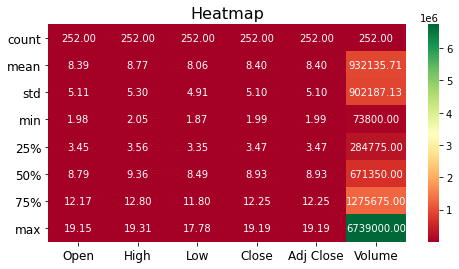

In [8]:

plt.figure(figsize=(8,4))
sns.heatmap(data.describe(), annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap", fontsize = 16)

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
data['Date'] = pd.to_datetime(data['Date'] ,format='%Y-%m-%d')
data.index = data['Date']

ValueError: ignored


History of trading open price:

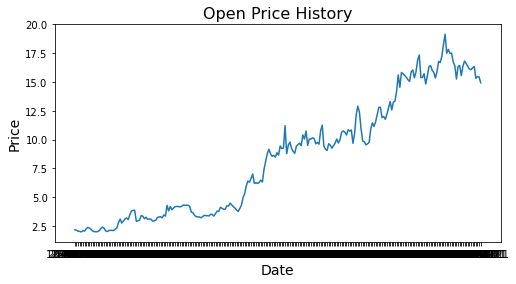

In [15]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of trading close price:

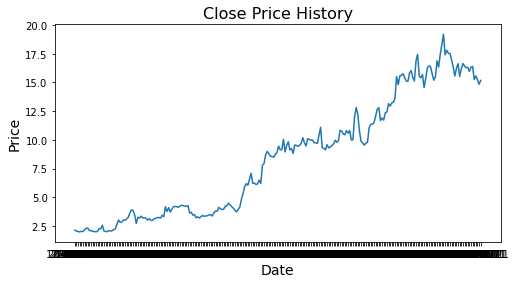

In [16]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price growth:

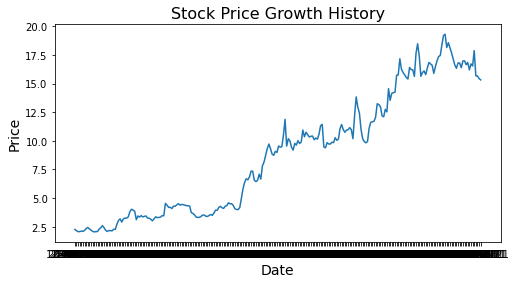

In [17]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of low stock price:

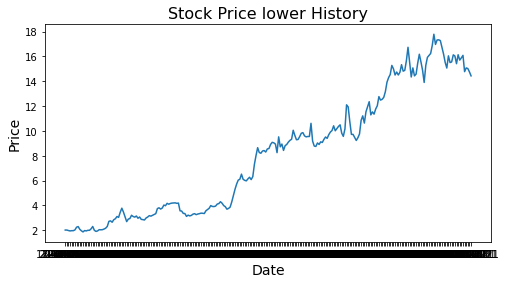

In [18]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of adjusted close stock price:

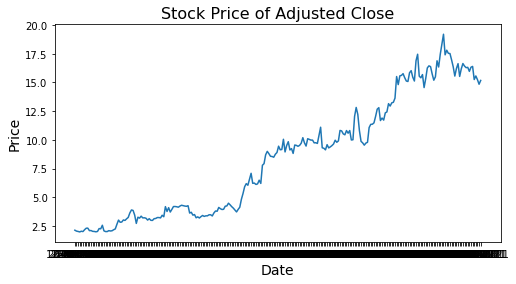

In [19]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Adj Close'])
plt.title("Stock Price of Adjusted Close", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price volume:

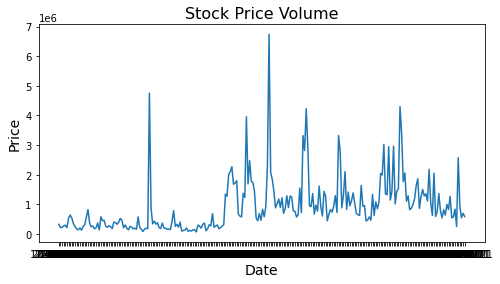

In [20]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Stock market volume price Prediction:

Assigning values for x and y:

In [21]:
x = data.iloc[:, 1:7].values
y = data.iloc[:, -1].values


Splitting the dataset using train_test_split:

In [22]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


Standard Scale transform:

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Random Forest Regression model training on the Training set:

In [25]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained



The Random Forest Regression model trained

In [26]:
y_pred = regressor.predict(x_test)
y_pred

array([ 681900.,  146050.,  935350.,  268550.,  712920., 2029450.,
       2588020., 1359790.,  198010., 1015840., 1518590., 2157140.,
       1708630.,  938500., 3906230.,  330850., 1162830., 1283790.,
       1367560.,  273210., 1689890.,  228180.,  646900., 1233330.,
       1727410.,  590700.,  544770.,  187180., 1078920.,  396100.,
        258540.,  851260.,  679540., 1372670.,  842820.,  784680.,
        625970.,  217270.,  176370.,  452170.,  462170.,  142820.,
       2955830.,  851260.,  392500., 2106830.,  838600.,  264070.,
        389210., 1098970.,  791180.,  935350.,  971800.,  111280.,
        443290., 1290030., 2171300.,  842820., 1675080.,  254070.,
       2855820.,  226830.,  649160.,  332080., 1004550.,  842330.,
        187070., 1691930.,  935350., 1275060., 1269500., 3446240.,
        175810.,  325560.,  226830.,  396100., 2107320.,  839210.,
        307840., 3808740.,  392500.,  704260.,   98030.,  198010.])


Visualizing the Train Result:

In [27]:
df = pd.DataFrame()
df

""


In [28]:
Pred_x_train = regressor.predict(x_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0       580660.0
1       627900.0
2      2949340.0
3      1265000.0
4       214040.0
         ...    
163     164240.0
164     577750.0
165    1691930.0
166     200120.0
167     739170.0
Name: predict_train, Length: 168, dtype: float64

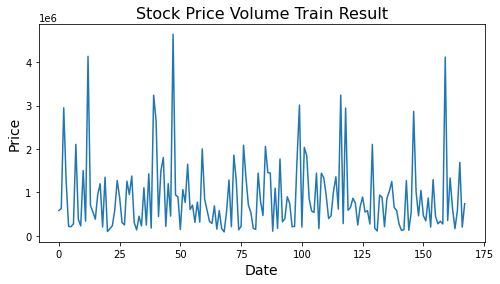

In [29]:
plt.figure(figsize=(8,4))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Visualizing the Test Result:

In [30]:
df1 = pd.DataFrame()
df1

""


In [31]:
df1['predict'] = y_pred
df1['predict']

0      681900.0
1      146050.0
2      935350.0
3      268550.0
4      712920.0
        ...    
79    3808740.0
80     392500.0
81     704260.0
82      98030.0
83     198010.0
Name: predict, Length: 84, dtype: float64

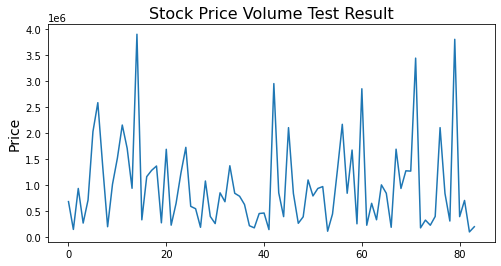

In [32]:

plt.figure(figsize=(8,4))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

Accuracy of model:

In [33]:

print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.0



Reading and Checking dataset of India News:

In [34]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [35]:
news_df.shape

(3424067, 3)

In [36]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [37]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [38]:
news_df['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid-19: Despite dip in cases; Rajasthan amon...
3424063    Covid-19: Despite dip in cases; Rajasthan amon...
3424064    Covid-19: Despite dip in cases; Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

In [39]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [40]:

news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic



Importing TextBlob:

In [43]:

from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05


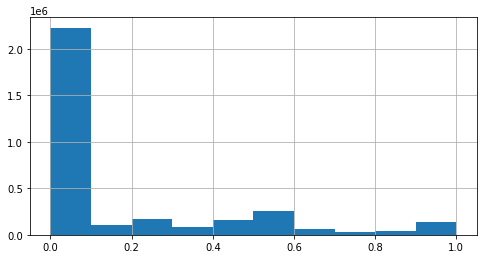

In [44]:
plt.figure(figsize = (8,4))
news_df['Subjectivity'].hist()
plt.show()

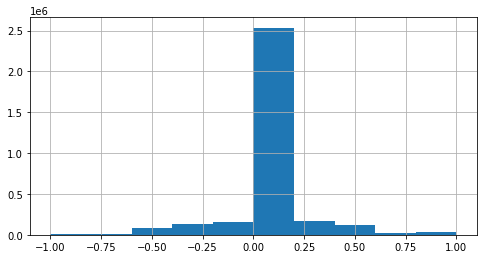

In [45]:
plt.figure(figsize = (8,4))
news_df['Polarity'].hist()
plt.show()

SentimentIntensity Analyzer:

In [46]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 5.8MB/s 


In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342
